<a href="https://colab.research.google.com/github/lephuocdat2000/AI/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Khai Báo Thư Viện**

In [36]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns; sns.set()

**Tải Bộ Dữ Liệu Lên**

In [37]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)  #đọc dữ liệu

# Ma Trận Dữ Liệu và 5 Phần Tử Đầu
print(dataset.shape)
print(dataset)
# Mô Tả Dữ Liệu

(150, 5)
     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [38]:
print(dataset.describe())
print(dataset.groupby('class').size())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [59]:
hide_data=dataset.iloc[145:150,:]
hide_data

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**Phân Tách Bộ Dữ Liệu và Tách Phân Lớp Class Khỏi Nhóm Hoa Iris** sử dụng train_test_split từ sklearn

In [72]:
from sklearn.model_selection import train_test_split
array = dataset.iloc[0:145,:].values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

Dùng biểu đồ để xem mối quan hệ giữa các đại lượng

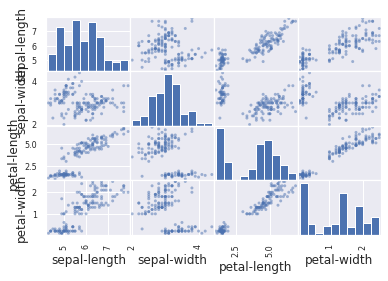

In [49]:
scatter_matrix(dataset)
plt.show()

**Thực Hiện Việc Kiểm Tra Và Đánh Giá Các Mô Hình Lên Hoa Iris** bằng các thuật toán classification cơ bản do sklearn hỗ trợ

In [73]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Decision Tree & Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# K-NN
from sklearn.neighbors import KNeighborsClassifier
# Gausian Naive Bayes
from sklearn.naive_bayes import GaussianNB
# SVM
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Đánh Giá Mô Hình bằng phương pháp đánh giá chéo
from sklearn.model_selection import cross_val_score
results = []
names = []
for name, model in models:
  	cv_results = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
  	results.append(cv_results)
  	names.append(name)
  	print(name, cv_results.mean())  #cv_results.mean: trung bình hiệu suất của 10 lần fold

LR 0.9477272727272726
KNN 0.9659090909090908
RF 0.9477272727272725
DTC 0.9477272727272725
NB 0.9462121212121211
SVM 0.9651515151515151


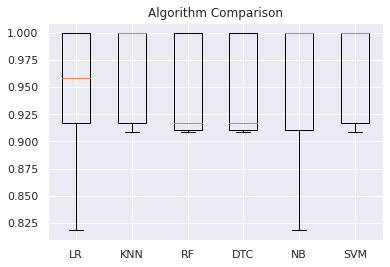

In [74]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

Ta thấy rằng đa số các model đều có sự giao động về độ chính xác sau 10 lần đánh giá chéo chỉ có SVM là luôn đạt độ chính xác ở mức cao nhất => SVM phù hợp với bộ dữ liệu này



---



Tiến hành train model bằng thuật toán SVM

In [75]:
# Kiểm Chứng Dự Đoán Lên Bộ Dữ Liệu Đánh Giá
from sklearn.metrics import accuracy_score
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.9655172413793104


accuracy_score: số lượng dự đoán đúng / tổng số mẫu dự đoán


Biểu diễn kết quả dự đoán dưới dạng confusion matrix

Text(89.18, 0.5, 'predicted label')

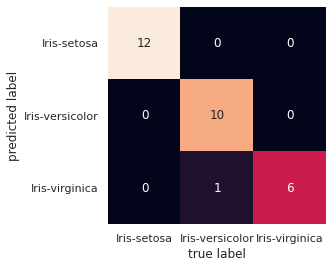

In [76]:
from sklearn.metrics import confusion_matrix
target_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
mat=confusion_matrix(Y_validation,predictions)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,xticklabels=target_names,yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Đánh giá f1-score

In [77]:
from sklearn.metrics import classification_report
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        29
      macro avg       0.97      0.95      0.96        29
   weighted avg       0.97      0.97      0.97        29



f1-score rất cao tuy nhiên vẫn còn cải thiện được

Tuning Hyperparameter sử dụng GridSearchCV do sklearn cung cấp

In [78]:
from sklearn.model_selection import GridSearchCV
param_grid={
             'kernel':['linear','rbf','poly'],
            }
search=GridSearchCV(model,param_grid,n_jobs=-1)
search.fit(X_validation,Y_validation)
search.best_params_

{'kernel': 'poly'}

GridSearch chọn kernel = linear để model đạt hiệu suất tốt nhất

Tiến hành train và đánh lại model với tham số kernel thay đổi

In [79]:
tuning_model = SVC(gamma='auto',kernel='poly')
tuning_model.fit(X_train, Y_train)
predictions = tuning_model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

1.0


In [80]:
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        29
      macro avg       1.00      1.00      1.00        29
   weighted avg       1.00      1.00      1.00        29



Hàm dự đoán loại hoa với đầu vào là 4 thông số chiều dài,chiều rộng của cánh hoa và đài hoa

In [81]:
def Predict_Func(x,y,z,t,model=tuning_model,train=X_train):
    arr=[[x,y,z,t]]
    pred=model.predict(arr)
    print("Loai hoa duoc model du doan la: ",pred[0])
    print("Thank you")

In [82]:
hide_data

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [84]:
Predict_Func(6.2,3.4,5.4,2.3)

Loai hoa duoc model du doan la:  Iris-virginica
Thank you
